## When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. In this chapter, you will learn how to find the optimal parameters, those that best describe your data.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
 715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
 104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
 166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
 308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
 1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
  77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
 557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
 1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
 219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
 176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
 774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
 192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
 156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
 576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
 3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
 110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
 192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
 1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
 2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
 1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
 420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
876,  381,  905,  156,  419,  239,  119,  129,  467])

## How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.



In [3]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [4]:
plt.style.use('seaborn-darkgrid')

Text(0, 0.5, 'PDF')

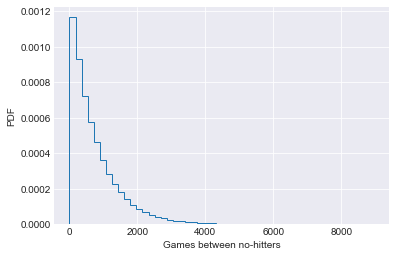

In [5]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')

## Do the data follow our story?
You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

__Instructions__
- Compute an ECDF from the actual time between no-hitters (nohitter_times). Use the ecdf() function you wrote in the prequel course.
- Create a CDF from the theoretical samples you took in the last exercise (inter_nohitter_time).
- Plot x_theor and y_theor as a line using plt.plot(). Then overlay the ECDF of the real data x and y as points. To do this, you have to specify the keyword arguments marker = '.' and linestyle = 'none' in addition to x and y inside plt.plot().
- Set a 2% margin on the plot.
- Show the plot.

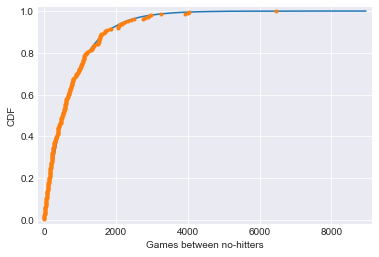

In [7]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

## How is this parameter optimal?
Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.



__Instructions__
- Take 10000 samples out of an Exponential distribution with parameter τ1/2 = tau/2.
- Take 10000 samples out of an Exponential distribution with parameter τ2 = 2*tau.
- Generate CDFs from these two sets of samples using your ecdf() function.
- Add these two CDFs as lines to your plot. This has been done for you, so hit 'Submit Answer' to view the plot!

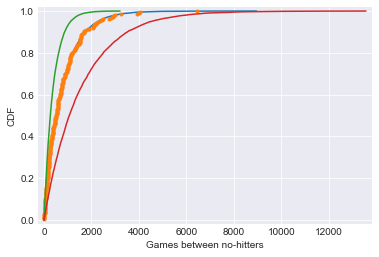

In [8]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
plt.plot(x_half, y_half)
plt.plot(x_double, y_double)

## EDA of literacy/fertility data
In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

In [11]:
df = pd.read_csv('female_literacy_fertility.csv')


In [14]:
df.columns

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')

In [15]:
fertility = df['fertility'].values
illiteracy = (100 - df['female literacy']).values

In [17]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

0.8041324026815346


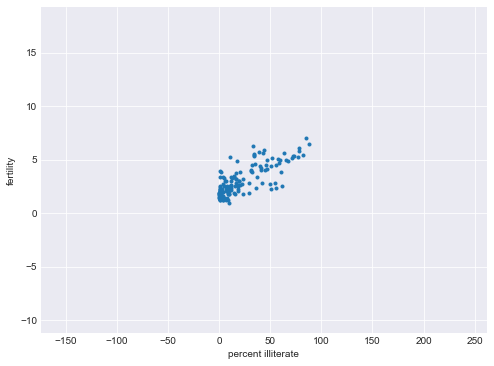

In [21]:
# Plot the illiteracy rate versus fertility
plt.figure(figsize = (8,6))
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
# Set the margins and label axes
plt.margins(2)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


## Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

__Instructions__
- Compute the slope and intercept of the regression line using np.polyfit(). Remember, fertility is on the y-axis and illiteracy on the x-axis.
- Print out the slope and intercept from the linear regression.
- To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). Then, compute the theoretical values of y based on your regression parameters. I.e., y = a * x + b.
- Plot the data and the regression line on the same plot. Be sure to label your axes.

slope = 0.049798548090634276 children per woman / percent illiterate
intercept = 1.8880506106365555 children per woman


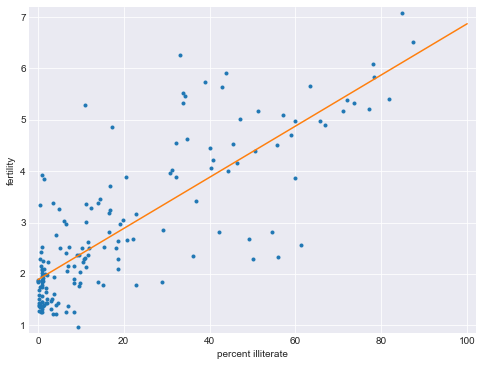

In [23]:
# Plot the illiteracy rate versus fertility
plt.figure(figsize = (8,6))
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
plt.plot(x,y)

## How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

__Instructions__
- Specify the values of the slope to compute the RSS. Use np.linspace() to get 200 points in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you could use np.linspace() like so: np.linspace(0, 0.5, 100).
- Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above. The empty_like() function returns a new array with the same shape and type as a given array (in this case, a_vals).
- Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by np.sum((y_data - a * x_data - b)**2). The variable b you computed in the last exercise is already in your namespace. Here, fertility is the y_data and illiteracy the x_data.
- Plot the RSS (rss) versus slope (a_vals)

Text(0, 0.5, 'sum of square of residuals')

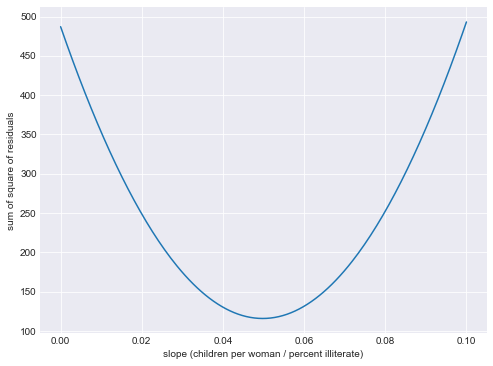

In [25]:
# Specify slopes to consider: a_vals
plt.figure(figsize = (8,6))
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

## Linear regression on appropriate Anscombe data
For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [32]:
anscombe = pd.read_csv('anscombe.csv', skiprows=1)
anscombe.head()

,x,y,x.1,y.1,x.2,y.2,x.3,y.3
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [33]:
len(anscombe)

11

In [34]:
x = anscombe['x'].values
y = anscombe['y'].values

__Instructions__
- Compute the parameters for the slope and intercept using np.polyfit(). The Anscombe data are stored in the arrays x and y.
- Print the slope a and intercept b.
- Generate theoretical x and y data from the linear regression. Your x array, which you can create with np.array(), should consist of 3 and 15. To generate the y data, multiply the slope by x_theor and add the intercept.
- Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the marker='.' and linestyle='none' keyword arguments in addition to x and y when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.

0.5000909090909095 3.000090909090908


Text(0, 0.5, 'y')

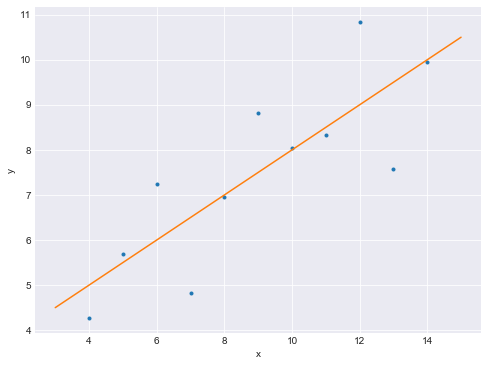

In [36]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, deg = 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
plt.figure(figsize = (8,6))
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

## Linear regression on all Anscombe data
Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 are the x and y values for the second Anscombe data set.

In [37]:
x1 = anscombe['x'].values
x2 = anscombe['x.1'].values
x3 = anscombe['x.2'].values
x4 = anscombe['x.3'].values

In [38]:
y1 = anscombe['y'].values
y2 = anscombe['y.1'].values
y3 = anscombe['y.2'].values
y4 = anscombe['y.3'].values

In [40]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

In [41]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, deg=1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.000090909090908
slope: 0.5000000000000001 intercept: 3.00090909090909
slope: 0.49972727272727313 intercept: 3.0024545454545444
slope: 0.49990909090909097 intercept: 3.001727272727272
